In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [3]:
Titanic_train = pd.read_csv("titanic_x_y_train.csv", delimiter= ",")
print(Titanic_train.shape)
Titanic_train

(668, 11)


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,2,"Weisz, Mrs. Leopold (Mathilde Francoise Pede)",female,29.0,1,0,228414,26.0000,NaN,S,1
1,3,"Williams, Mr. Howard Hugh ""Harry""",male,NaN,0,0,A/5 2466,8.0500,NaN,S,0
2,2,"Morley, Mr. Henry Samuel (""Mr Henry Marshall"")",male,39.0,0,0,250655,26.0000,NaN,S,0
3,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S,0
4,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...
663,2,"Ilett, Miss. Bertha",female,17.0,0,0,SO/C 14885,10.5000,NaN,S,1
664,3,"Morrow, Mr. Thomas Rowan",male,NaN,0,0,372622,7.7500,NaN,Q,0
665,3,"Bing, Mr. Lee",male,32.0,0,0,1601,56.4958,NaN,S,1
666,3,"Strandberg, Miss. Ida Sofia",female,22.0,0,0,7553,9.8375,NaN,S,0


In [4]:
Titanic_test = pd.read_csv("titanic_x_test.csv", delimiter= ",")
print(Titanic_test.shape)
Titanic_test

(223, 10)


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,2,"Davies, Master. John Morgan Jr",male,8.0,1,1,C.A. 33112,36.7500,NaN,S
1,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,D17,S
2,3,"Kilgannon, Mr. Thomas J",male,NaN,0,0,36865,7.7375,NaN,Q
3,2,"Jacobsohn, Mrs. Sidney Samuel (Amy Frances Chr...",female,24.0,2,1,243847,27.0000,NaN,S
4,1,"McGough, Mr. James Robert",male,36.0,0,0,PC 17473,26.2875,E25,S
...,...,...,...,...,...,...,...,...,...,...
218,3,"Lindqvist, Mr. Eino William",male,20.0,1,0,STON/O 2. 3101285,7.9250,NaN,S
219,1,"Butt, Major. Archibald Willingham",male,45.0,0,0,113050,26.5500,B38,S
220,1,"Penasco y Castellana, Mrs. Victor de Satode (M...",female,17.0,1,0,PC 17758,108.9000,C65,C
221,3,"Holm, Mr. John Fredrik Alexander",male,43.0,0,0,C 7075,6.4500,NaN,S


In [5]:
Titanic_train.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked', 'Survived'],
      dtype='object')

In [6]:
Titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668 entries, 0 to 667
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    668 non-null    int64  
 1   Name      668 non-null    object 
 2   Sex       668 non-null    object 
 3   Age       536 non-null    float64
 4   SibSp     668 non-null    int64  
 5   Parch     668 non-null    int64  
 6   Ticket    668 non-null    object 
 7   Fare      668 non-null    float64
 8   Cabin     154 non-null    object 
 9   Embarked  667 non-null    object 
 10  Survived  668 non-null    int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 57.5+ KB


In [7]:
Titanic_train.dtypes

Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
Survived      int64
dtype: object

In [8]:
Titanic_train.describe()

,Pclass,Age,SibSp,Parch,Fare,Survived
count,668.000000,536.000000,668.000000,668.000000,668.000000,668.000000
mean,2.296407,29.700560,0.528443,0.407186,32.064552,0.402695
std,0.831638,14.240257,1.080327,0.854695,45.320835,0.490808
min,1.000000,0.670000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,21.000000,0.000000,0.000000,7.925000,0.000000
50%,3.000000,29.000000,0.000000,0.000000,14.750000,0.000000
75%,3.000000,38.250000,1.000000,0.000000,31.275000,1.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


<AxesSubplot:xlabel='Survived', ylabel='count'>

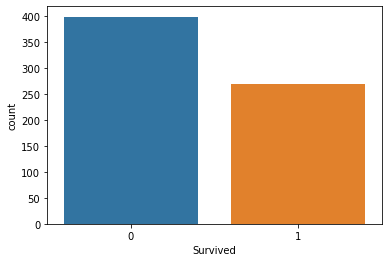

In [9]:
sns.countplot(x = 'Survived', data = Titanic_train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

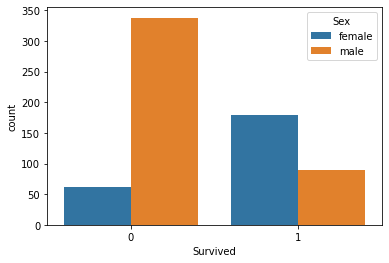

In [10]:
sns.countplot(x = 'Survived', data = Titanic_train, hue = 'Sex')

In [11]:
Titanic_train.isna()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,False,False,False,False,False,False,False,False,True,False,False
1,False,False,False,True,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
663,False,False,False,False,False,False,False,False,True,False,False
664,False,False,False,True,False,False,False,False,True,False,False
665,False,False,False,False,False,False,False,False,True,False,False
666,False,False,False,False,False,False,False,False,True,False,False


In [12]:
Titanic_train.isna().sum()

Pclass        0
Name          0
Sex           0
Age         132
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       514
Embarked      1
Survived      0
dtype: int64

<AxesSubplot:>

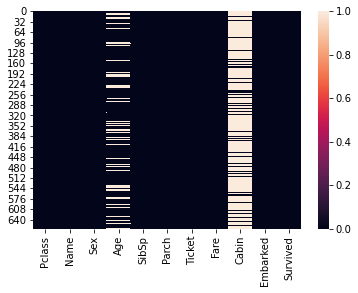

In [13]:
sns.heatmap(Titanic_train.isna())

In [14]:
(Titanic_train['Age'].isna().sum() / len(Titanic_train['Age'])) * 100

19.760479041916167

In [15]:
(Titanic_train['Cabin'].isna().sum() / len(Titanic_train['Cabin'])) * 100

76.94610778443113

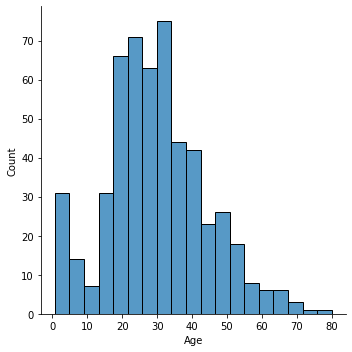

In [16]:
sns.displot(x = 'Age', data = Titanic_train)

In [17]:
Titanic_train['Age'].fillna(Titanic_train['Age'].mean(), inplace = True)

In [18]:
Titanic_train['Age'].isna().sum()

0

In [19]:
Titanic_train.drop('Cabin', axis = 1, inplace = True)

In [20]:
Titanic_train.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,2,"Weisz, Mrs. Leopold (Mathilde Francoise Pede)",female,29.00000,1,0,228414,26.000,S,1
1,3,"Williams, Mr. Howard Hugh ""Harry""",male,29.70056,0,0,A/5 2466,8.050,S,0
2,2,"Morley, Mr. Henry Samuel (""Mr Henry Marshall"")",male,39.00000,0,0,250655,26.000,S,0
3,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.00000,0,4,349909,21.075,S,0
4,3,"Sutehall, Mr. Henry Jr",male,25.00000,0,0,SOTON/OQ 392076,7.050,S,0


In [21]:
gender = pd.get_dummies(Titanic_train['Sex'], drop_first = True)

In [22]:
Titanic_train['Gender'] = gender

In [23]:
Titanic_train.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived,Gender
0,2,"Weisz, Mrs. Leopold (Mathilde Francoise Pede)",female,29.00000,1,0,228414,26.000,S,1,0
1,3,"Williams, Mr. Howard Hugh ""Harry""",male,29.70056,0,0,A/5 2466,8.050,S,0,1
2,2,"Morley, Mr. Henry Samuel (""Mr Henry Marshall"")",male,39.00000,0,0,250655,26.000,S,0,1
3,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.00000,0,4,349909,21.075,S,0,0
4,3,"Sutehall, Mr. Henry Jr",male,25.00000,0,0,SOTON/OQ 392076,7.050,S,0,1


In [24]:
Titanic_train.drop(['Name', 'Sex', 'Ticket', 'Embarked'], axis = 1, inplace = True)

In [25]:
Titanic_train.head()

,Pclass,Age,SibSp,Parch,Fare,Survived,Gender
0,2,29.00000,1,0,26.000,1,0
1,3,29.70056,0,0,8.050,0,1
2,2,39.00000,0,0,26.000,0,1
3,3,29.00000,0,4,21.075,0,0
4,3,25.00000,0,0,7.050,0,1


In [26]:
X_train = Titanic_train[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Gender']]
Y_train = Titanic_train['Survived']

In [27]:
Titanic_test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,2,"Davies, Master. John Morgan Jr",male,8.0,1,1,C.A. 33112,36.7500,NaN,S
1,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,D17,S
2,3,"Kilgannon, Mr. Thomas J",male,NaN,0,0,36865,7.7375,NaN,Q
3,2,"Jacobsohn, Mrs. Sidney Samuel (Amy Frances Chr...",female,24.0,2,1,243847,27.0000,NaN,S
4,1,"McGough, Mr. James Robert",male,36.0,0,0,PC 17473,26.2875,E25,S


In [28]:
Titanic_test.isna().sum()

Pclass        0
Name          0
Sex           0
Age          45
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       173
Embarked      1
dtype: int64

In [29]:
Titanic_test.dtypes

Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

<AxesSubplot:>

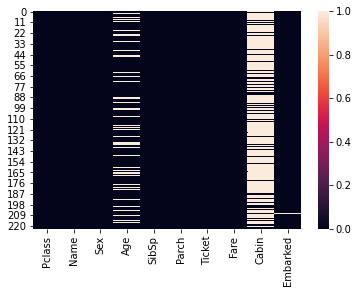

In [30]:
sns.heatmap(Titanic_test.isna())

In [31]:
Titanic_test['Age'].fillna(Titanic_test['Age'].mean(), inplace = True)

In [32]:
Titanic_test['Age'].isna().sum()

0

In [33]:
Titanic_test.drop('Cabin', axis = 1, inplace = True)

In [34]:
Titanic_test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,2,"Davies, Master. John Morgan Jr",male,8.000000,1,1,C.A. 33112,36.7500,S
1,1,"Leader, Dr. Alice (Farnham)",female,49.000000,0,0,17465,25.9292,S
2,3,"Kilgannon, Mr. Thomas J",male,29.694775,0,0,36865,7.7375,Q
3,2,"Jacobsohn, Mrs. Sidney Samuel (Amy Frances Chr...",female,24.000000,2,1,243847,27.0000,S
4,1,"McGough, Mr. James Robert",male,36.000000,0,0,PC 17473,26.2875,S


In [35]:
gender = pd.get_dummies(Titanic_test['Sex'], drop_first = True)


In [36]:
Titanic_test['Gender'] = gender
Titanic_test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Gender
0,2,"Davies, Master. John Morgan Jr",male,8.000000,1,1,C.A. 33112,36.7500,S,1
1,1,"Leader, Dr. Alice (Farnham)",female,49.000000,0,0,17465,25.9292,S,0
2,3,"Kilgannon, Mr. Thomas J",male,29.694775,0,0,36865,7.7375,Q,1
3,2,"Jacobsohn, Mrs. Sidney Samuel (Amy Frances Chr...",female,24.000000,2,1,243847,27.0000,S,0
4,1,"McGough, Mr. James Robert",male,36.000000,0,0,PC 17473,26.2875,S,1


In [37]:
Titanic_test.drop(['Name', 'Sex', 'Ticket', 'Embarked'], axis = 1, inplace = True)

In [38]:
Titanic_test.head()

,Pclass,Age,SibSp,Parch,Fare,Gender
0,2,8.000000,1,1,36.7500,1
1,1,49.000000,0,0,25.9292,0
2,3,29.694775,0,0,7.7375,1
3,2,24.000000,2,1,27.0000,0
4,1,36.000000,0,0,26.2875,1


In [39]:
X_test = Titanic_test[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Gender']]

In [40]:
 X_test

,Pclass,Age,SibSp,Parch,Fare,Gender
0,2,8.000000,1,1,36.7500,1
1,1,49.000000,0,0,25.9292,0
2,3,29.694775,0,0,7.7375,1
3,2,24.000000,2,1,27.0000,0
4,1,36.000000,0,0,26.2875,1
...,...,...,...,...,...,...
218,3,20.000000,1,0,7.9250,1
219,1,45.000000,0,0,26.5500,1
220,1,17.000000,1,0,108.9000,0
221,3,43.000000,0,0,6.4500,1


In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
clf = LogisticRegression()

In [43]:
clf.fit(X_train, Y_train)

LogisticRegression()

In [44]:
Y_pred = clf.predict(X_test)

In [49]:
Y_pred

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0], dtype=int64)

In [52]:
np.savetxt('titanic_prediction.csv', Y_pred, delimiter = ",", fmt = '%10.0f')

In [46]:
#df = pd.DataFrame(Y_pred)

In [47]:
#df.to_csv("y_pred_titanic.csv", index = False)